IMPORT LIBRARY

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
import missingno as msn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

Import Data

In [39]:
df=pd.read_csv('chronickidneydisease.csv')
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


Describe Data

In [40]:
df.shape

(400, 26)

In [41]:
df.head()


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [42]:
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [44]:
df.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

## **Data Preprocessing**

Check for Missing values and deal with them

In [45]:
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

<AxesSubplot:>

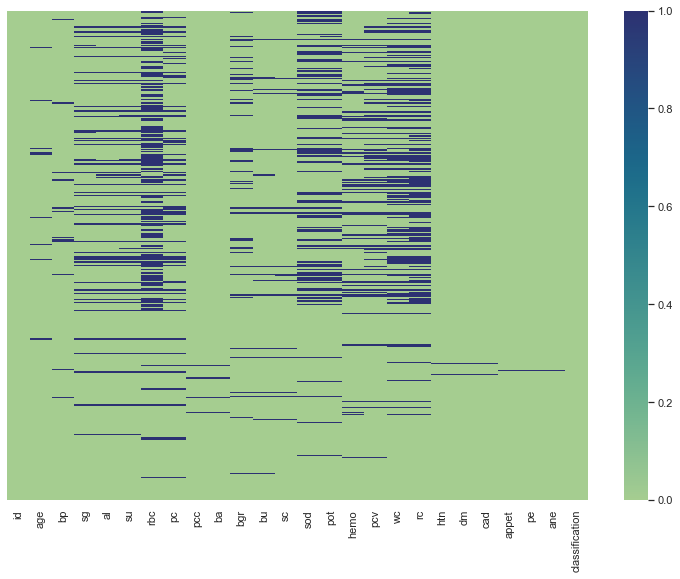

In [46]:
f, ax = plt.subplots(figsize=(13, 9))
sns.heatmap(df.isnull(),yticklabels=False,cmap="crest")

In [47]:
df["age"]=df["age"].fillna(df["age"].mean())

In [48]:
df['age'].isnull().sum()

0

In [49]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [50]:
df["sg"]=df["sg"].fillna(df["sg"].mean())
df["al"]=df["al"].fillna(df["al"].mean())
df["bp"]=df["bp"].fillna(df["bp"].mean())

In [51]:
numerical=[]
for col in df.columns:
    if df[col].dtype=="float64":
        numerical.append(col)
print(numerical)
for col in df.columns:
    if col in numerical:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo']


In [52]:
df.isnull().sum()


id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

Finding Correlation

In [53]:
df.corr()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
id,1.000000,-0.184043,-0.243732,0.613623,-0.520040,-0.247181,-0.297213,-0.299054,-0.263262,0.316549,-0.071029,0.607231
age,-0.184043,1.000000,0.148004,-0.180570,0.114764,0.187615,0.230858,0.192809,0.133438,-0.085760,0.049753,-0.175166
bp,-0.243732,0.148004,1.000000,-0.182463,0.146593,0.190218,0.150075,0.182980,0.144478,-0.102120,0.064715,-0.279024
sg,0.613623,-0.180570,-0.182463,1.000000,-0.466698,-0.282115,-0.308115,-0.274926,-0.210004,0.236087,-0.051244,0.529966
al,-0.520040,0.114764,0.146593,-0.466698,1.000000,0.261983,0.309238,0.406913,0.232673,-0.268868,0.110606,-0.549426
su,-0.247181,0.187615,0.190218,-0.282115,0.261983,1.000000,0.627002,0.126897,0.096434,-0.051758,0.177396,-0.156807
bgr,-0.297213,0.230858,0.150075,-0.308115,0.309238,0.627002,1.000000,0.118859,0.068886,-0.130569,0.052732,-0.254435
bu,-0.299054,0.192809,0.182980,-0.274926,0.406913,0.126897,0.118859,1.000000,0.581517,-0.308806,0.339771,-0.541635
sc,-0.263262,0.133438,0.144478,-0.210004,0.232673,0.096434,0.068886,0.581517,1.000000,-0.624036,0.204751,-0.342492
sod,0.316549,-0.085760,-0.102120,0.236087,-0.268868,-0.051758,-0.130569,-0.308806,-0.624036,1.000000,0.069612,0.331483


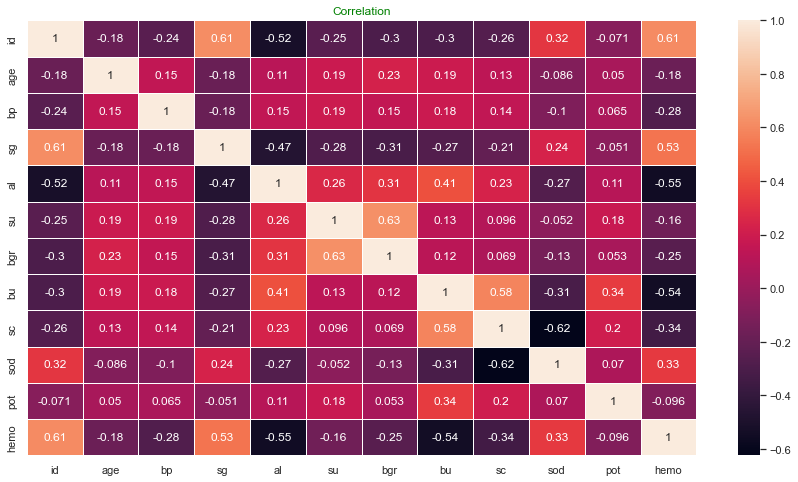

In [54]:
plt.figure(figsize=(15,8));
plt.title("Correlation",color="green")
sns.heatmap(df.corr(),linewidth=1,annot=True);

In [55]:
df.duplicated().value_counts() # checking for duuplicates

False    400
dtype: int64

In [56]:
df['classification'].value_counts()

ckd       248
notckd    150
ckd\t       2
Name: classification, dtype: int64

In [57]:
df["classification"]=df["classification"].replace("ckd\t","ckd",regex=True)

In [58]:
df['classification'].value_counts()

ckd       250
notckd    150
Name: classification, dtype: int64

Dropping unnecessary columns

In [59]:
df.drop('id',axis=1,inplace=True)

In [60]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,121.0,...,38,6000,5.2,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,5.2,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


Finding and replacing the outliers

In [61]:
df.dtypes

age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

<AxesSubplot:xlabel='hemo'>

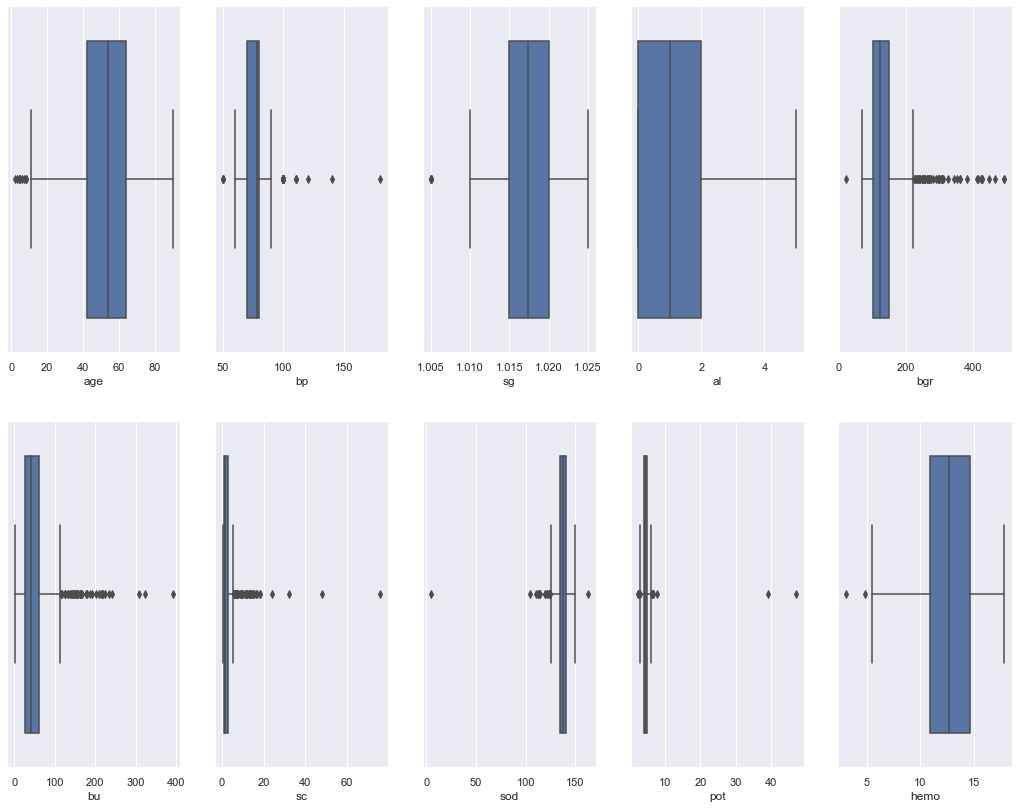

In [62]:
sns.set_theme(style="darkgrid")
fig, ((ax1, ax2,ax3,ax4,ax5), (ax6, ax7,ax8,ax9,ax10))= plt.subplots(nrows=2, ncols=5, figsize=(18,14))
sns.boxplot(data=df,x="age",ax=ax1)
sns.boxplot(data=df,x="bp",ax=ax2)
sns.boxplot(data=df,x="sg",ax=ax3)
sns.boxplot(data=df,x="al",ax=ax4)
sns.boxplot(data=df,x="bgr",ax=ax5)
sns.boxplot(data=df,x="bu",ax=ax6)
sns.boxplot(data=df,x="sc",ax=ax7)
sns.boxplot(data=df,x="sod",ax=ax8)
sns.boxplot(data=df,x="pot",ax=ax9)
sns.boxplot(data=df,x="hemo",ax=ax10)

In [63]:
p25 = df['bgr'].quantile(0.25)
p75 = df['bgr'].quantile(0.75)
iqr=p75-p25
# Finding upper and lower limit
upper_limit = p75 + 1.5 * iqr
lower_limit = p25 - 1.5 * iqr
df[df['bgr'] > upper_limit]
df[df['bgr'] < lower_limit]
#Trimming the outlier
new_df = df[df['bgr'] < upper_limit]


In [64]:
p25 = df['sc'].quantile(0.25)
p75 = df['sc'].quantile(0.75)
iqr=p75-p25
# Finding upper and lower limit
upper_limit = p75 + 1.5 * iqr
lower_limit = p25 - 1.5 * iqr
df[df['sc'] > upper_limit]
df[df['sc'] < lower_limit]
#Trimming the outlier
new_df = df[df['sc'] < upper_limit]

In [65]:
p25 = df['bu'].quantile(0.25)
p75 = df['bu'].quantile(0.75)
iqr=p75-p25
# Finding upper and lower limit
upper_limit = p75 + 1.5 * iqr
lower_limit = p25 - 1.5 * iqr
df[df['bu'] > upper_limit]
df[df['bu'] < lower_limit]
#Trimming the outlier
new_df = df[df['bu'] < upper_limit]

Data Exploration

In [66]:
df.dtypes

age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

c:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

<AxesSubplot:xlabel='sod', ylabel='Density'>

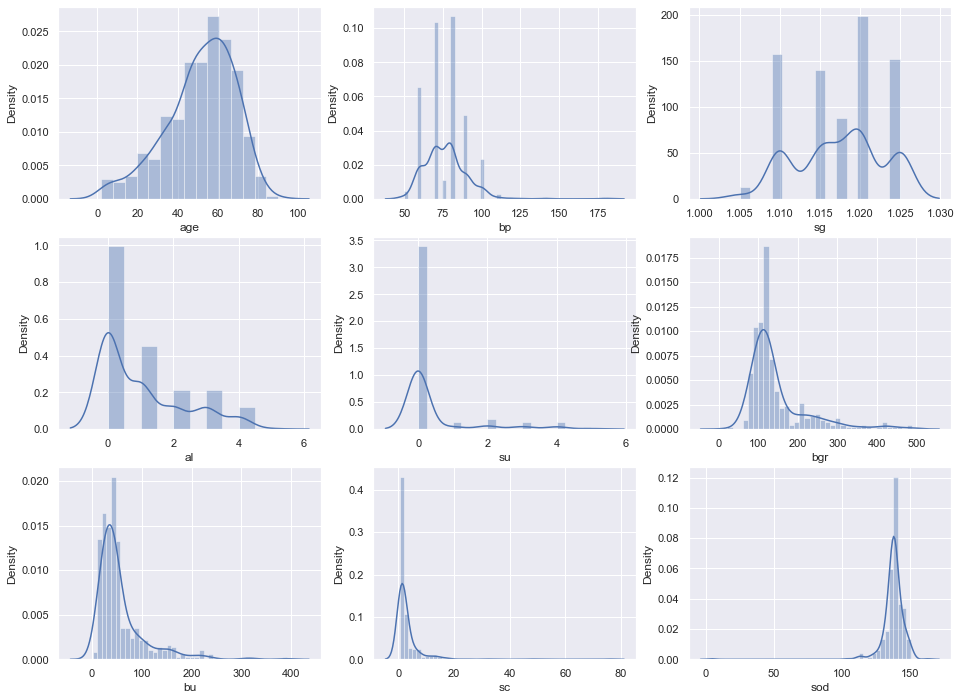

In [67]:
fig, ax = plt.subplots(figsize=(16,12), ncols=3, nrows=3)
sns.set_style("dark")
sns.set_context("notebook")

sns.distplot(df['age'],kde =True, ax=ax[0][0])
sns.distplot(df['bp'],   kde =True, ax=ax[0][1])
sns.distplot(df['sg'],  kde =True, ax=ax[0][2])
sns.distplot(df['al'],  kde =True, ax=ax[1][0])
sns.distplot(df['su'],  kde =True, ax=ax[1][1])
sns.distplot(df['bgr'],  kde =True, ax=ax[1][2])
sns.distplot(df['bu'],  kde =True, ax=ax[2][0])
sns.distplot(df['sc'],  kde =True, ax=ax[2][1])
sns.distplot(df['sod'],  kde =True, ax=ax[2][2])

In [68]:
df.dtypes

age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

<AxesSubplot:xlabel='age', ylabel='sg'>

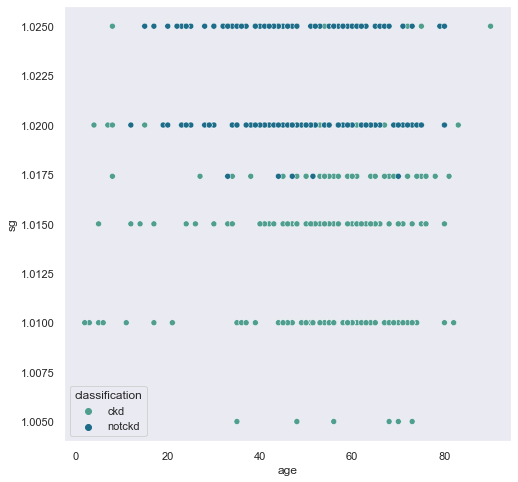

In [69]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=df, x="age", y="sg", hue="classification",palette = "crest")

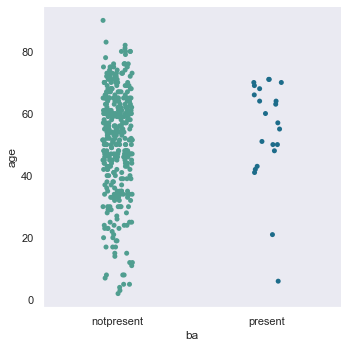

In [70]:
sns.catplot(data=df, x="ba", y="age",palette = "crest")

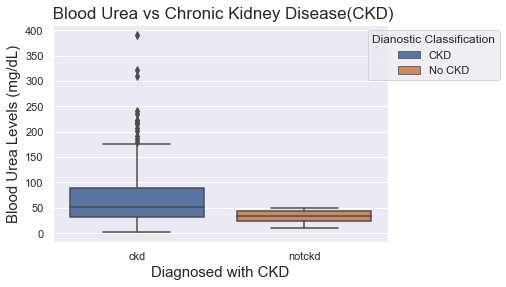

In [71]:
sns.set_style('darkgrid')
ax = sns.boxplot(x='classification',y='bu', hue = 'classification', data=df,width=0.8, dodge=False)
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['CKD','No CKD'], bbox_to_anchor=(1.35,1),
                         title = 'Dianostic Classification')
ax.set_title(' Blood Urea vs Chronic Kidney Disease(CKD)',fontsize=17)
ax.set_xlabel('Diagnosed with CKD',fontsize=15)
ax.set_ylabel('Blood Urea Levels (mg/dL)',fontsize=15)
plt.show()

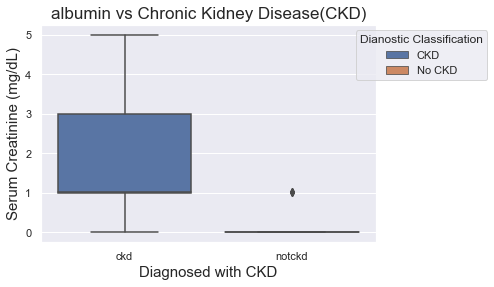

In [72]:
sns.set_style('darkgrid')
ax = sns.boxplot(x='classification',y='al', hue = 'classification', data=df,width=0.8, dodge=False)
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['CKD','No CKD'], bbox_to_anchor=(1.35,1),
                         title = 'Dianostic Classification')
ax.set_title('albumin vs Chronic Kidney Disease(CKD)',fontsize=17)
ax.set_xlabel('Diagnosed with CKD',fontsize=15)
ax.set_ylabel('Serum Creatinine (mg/dL)',fontsize=15)
plt.show()

**Check for Categorical columns and perform encoding**

In [73]:
le = LabelEncoder()
object_col = [col for col in df.columns if df[col].dtype == 'object']
for col in object_col:
    df[col] = le.fit_transform(df[col])

In [74]:
df.dtypes

age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                 int32
pc                  int32
pcc                 int32
ba                  int32
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                 int32
wc                  int32
rc                  int32
htn                 int32
dm                  int32
cad                 int32
appet               int32
pe                  int32
ane                 int32
classification      int32
dtype: object